In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [4]:
leads_df = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [5]:
# replacing "Select" with nan
leads_df = leads_df.replace(to_replace='Select', value=np.nan)

In [6]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# finding columns to drop where null percenatge is more than 45
fields_to_drop = null_counts[null_counts > 45]
fields_to_drop

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [9]:
# droping cloumns with high null percentage
leads_df = leads_df.drop(fields_to_drop.index, axis=1)
leads_df.shape

(9240, 28)

In [10]:
# find list of categorical columns
cat_columns = leads_df.select_dtypes(['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Find percenatge count of values in each column
def print_per_count():
    for col in cat_columns:
        print(f'**{col}**')
        print(round(leads_df[col].value_counts(normalize=True)*100,2))
        print()

print_per_count()

**Lead Origin**
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

**Lead Source**
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Press_Release         0.02
Live Chat             0.02
welearnblog_Home      0.01
blog                  0.01
testone               0.01
youtubechannel        0.01
WeLearn               0.01
NC_EDM                0.01
Pay per Click Ads     0.01
Name: Lead Source, dtype: float64

**Do Not Email**
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

**Do Not Call**
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

**Last Act

In [12]:
def find_skwed_cols():
    skwed_cols = []
    for col in cat_columns:
        per_count = round(leads_df[col].value_counts(normalize=True)*100,2)
        if(per_count[0] >= 99):
            skwed_cols.append(col)
    return skwed_cols

skwed_cols = find_skwed_cols()
skwed_cols

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
# drop highly skwed columns
leads_df = leads_df.drop(skwed_cols, axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# function to replace all the values which have less percentage count less than provided percentage with value 'Others'
def replace_with_other(col, per):
    temp = round(leads_df[col].value_counts(normalize=True)*100,2)
    temp = temp[temp < per]
    leads_df[col] = leads_df[col].apply(lambda x: 'Others' if x in temp.index else x)

In [15]:
replace_with_other('Lead Origin', 10)
replace_with_other('Lead Source', 10)
replace_with_other('Last Activity', 5)
replace_with_other('Country', 5)
replace_with_other('What is your current occupation', 5)
replace_with_other('Tags', 1)
replace_with_other('Last Notable Activity', 5)

In [16]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [17]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


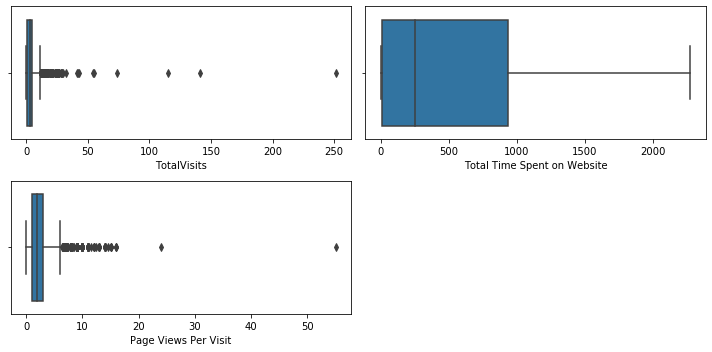

In [18]:
plt.figure(figsize=(10,5))
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(leads_df[col])
    i = i+1
plt.tight_layout()
plt.show()

#### Imputation

In [19]:
def impute_with_median(col):
    leads_df[col] = leads_df[col].fillna(leads_df[col].median())

In [20]:
impute_with_median('TotalVisits')
impute_with_median('Total Time Spent on Website')
impute_with_median('Page Views Per Visit')

In [21]:
leads_df = leads_df[~leads_df['Lead Source'].isnull()]

In [22]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.10
Country                                   26.36
Specialization                            36.42
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [24]:
# converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

### Dummy Variables

In [25]:
leads_df.select_dtypes(['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'Last Notable Activity'],
      dtype='object')

In [26]:
rem_cat_cols = leads_df.select_dtypes(['object']).columns

for col in rem_cat_cols:
    dummy = pd.get_dummies(leads_df[col], prefix=col, drop_first=True)
    leads_df = pd.concat([leads_df, dummy], axis=1)
    
leads_df = leads_df.drop(rem_cat_cols, axis=1)
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9204 non-null   int64  
 1   TotalVisits                                           9204 non-null   float64
 2   Total Time Spent on Website                           9204 non-null   int64  
 3   Page Views Per Visit                                  9204 non-null   float64
 4   A free copy of Mastering The Interview                9204 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9204 non-null   uint8  
 6   Lead Origin_Others                                    9204 non-null   uint8  
 7   Lead Source_Google                                    9204 non-null   uint8  
 8   Lead Source_Olark Chat                                9204

### Test-Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#Putting target to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [30]:
# Putting features to X
X = leads_df.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,...,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.loc[:,['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2835,-0.092199,1.892235,0.287109
3088,-0.092199,-0.469942,0.287109
8413,0.308979,1.919830,1.210231
5015,-0.092199,1.459905,0.287109
5166,-0.693965,-0.896752,-1.097575


In [34]:
# checking conversion rate
round(100 * sum(leads_df['Converted'])/leads_df.shape[0],2)

38.37

We have almost 38% conversion rate

### Looking at Correlations

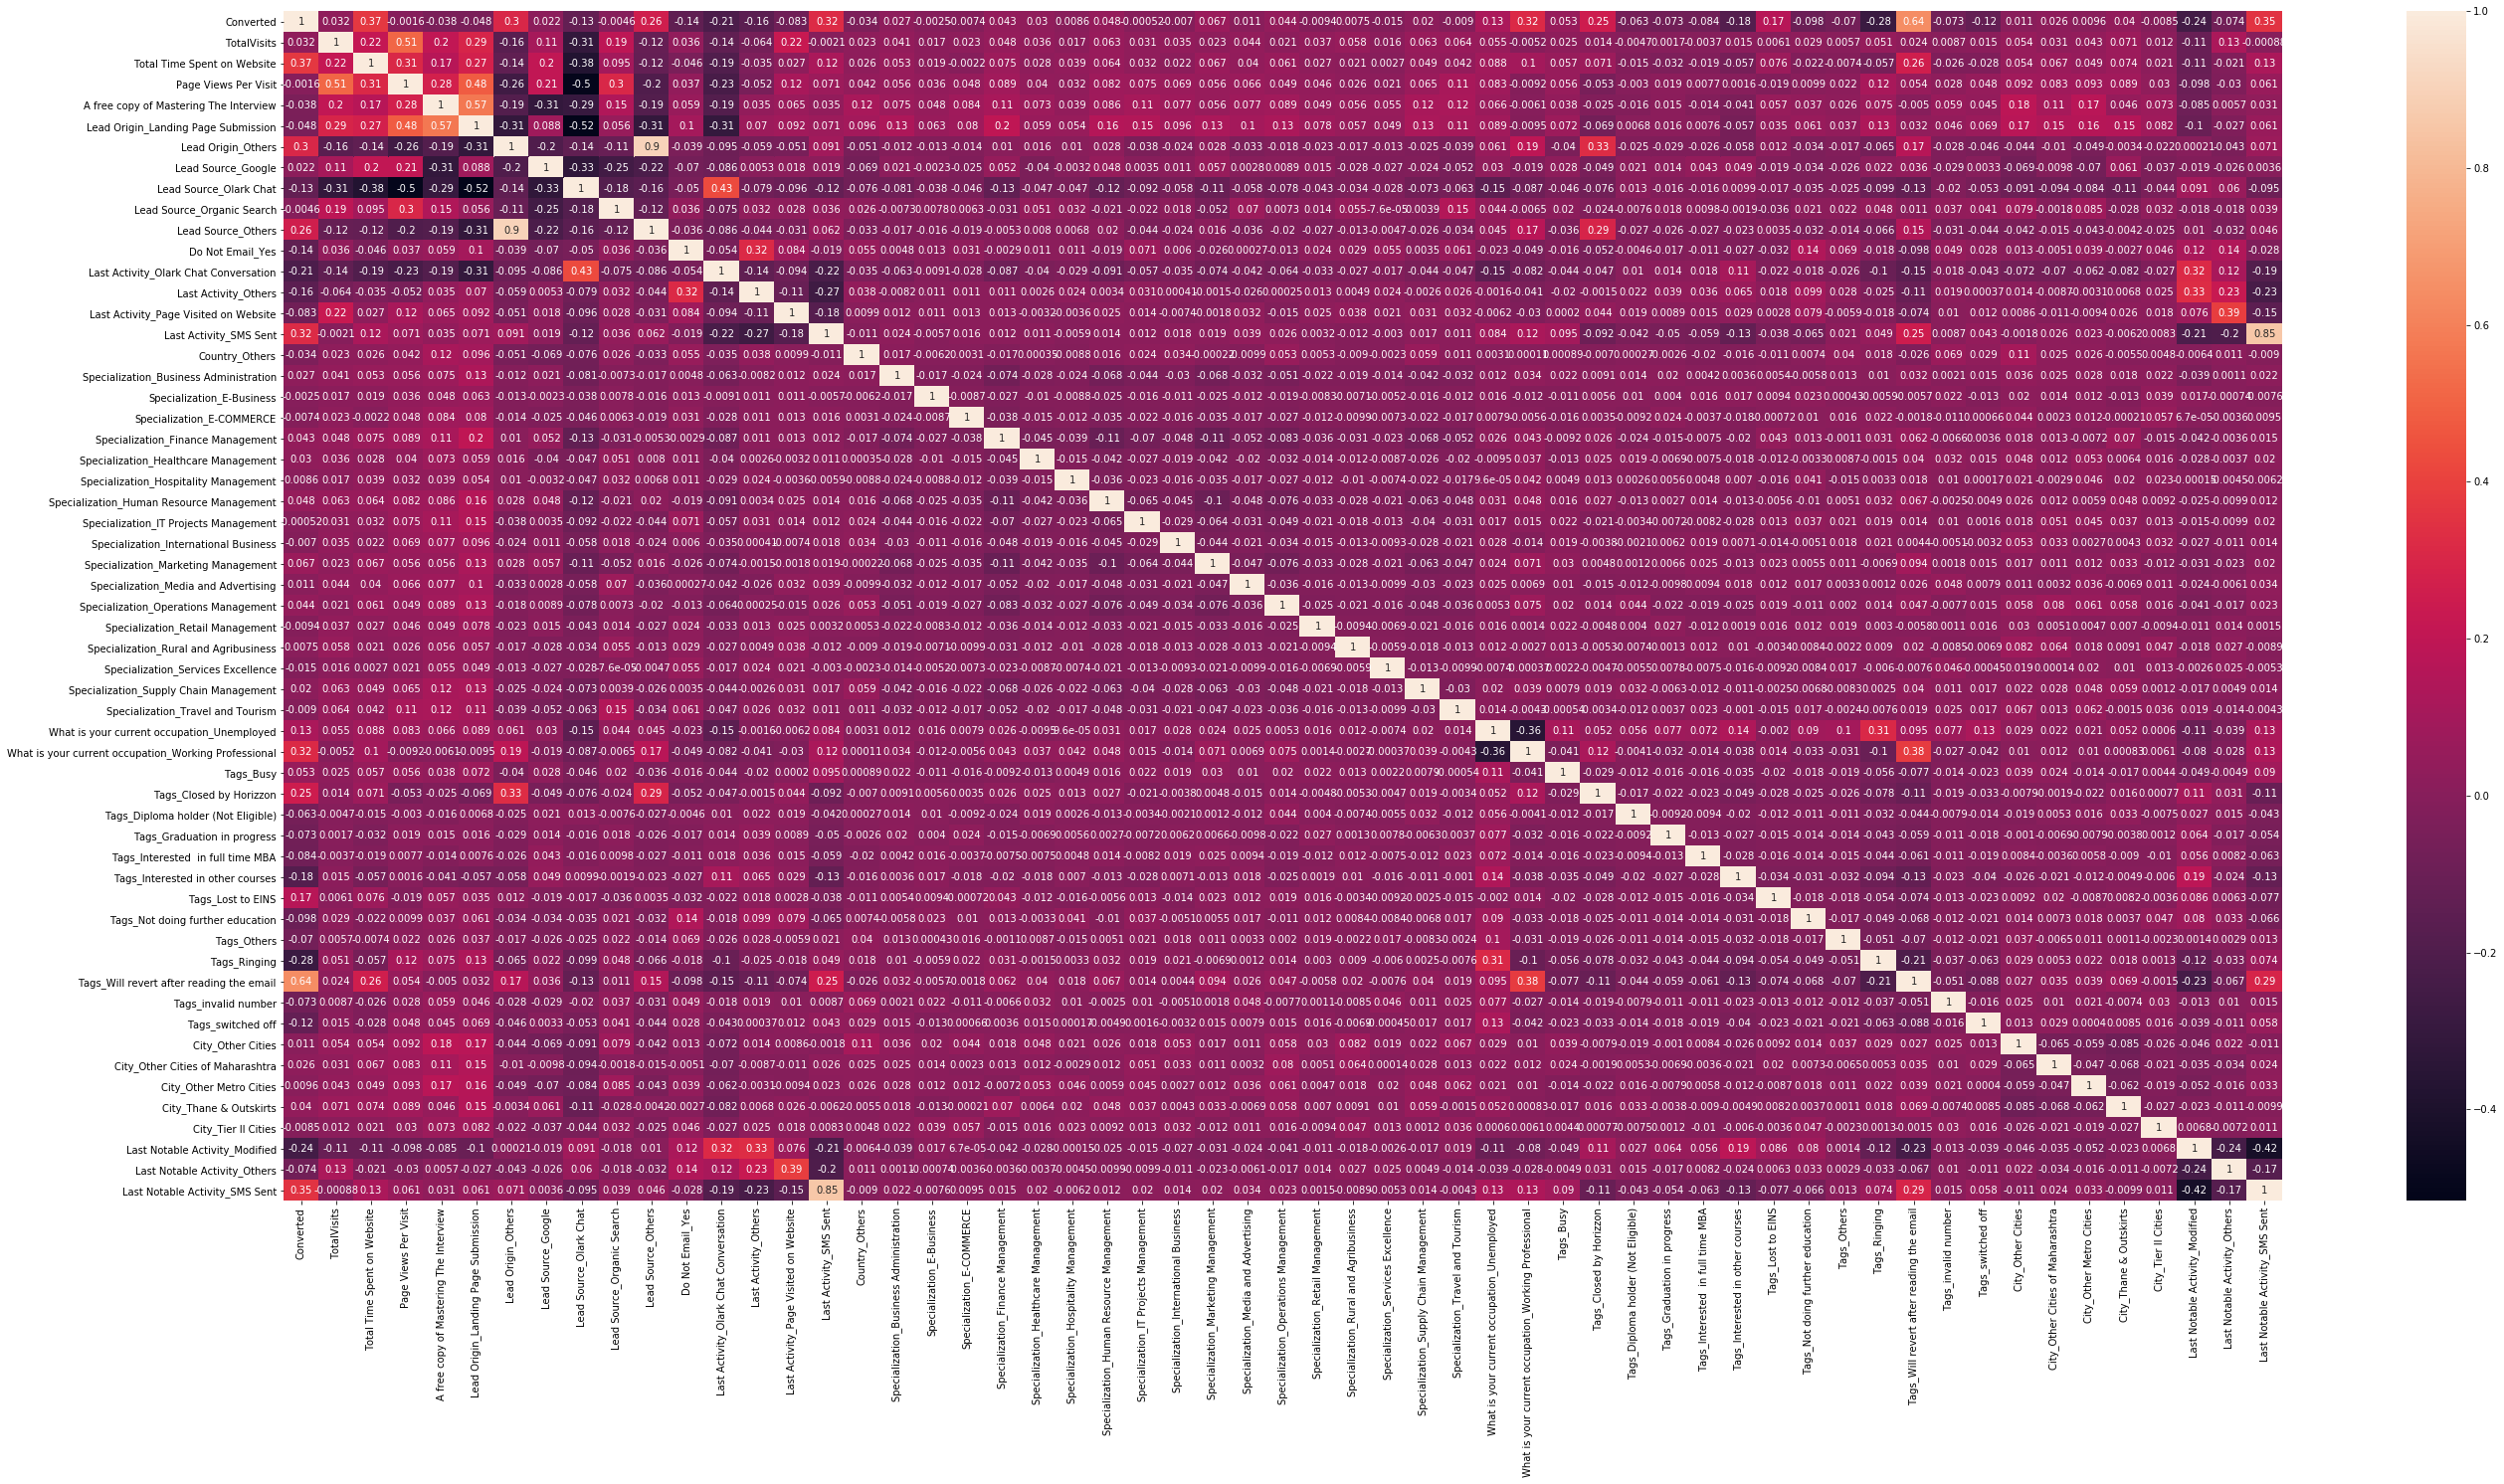

In [35]:
plt.figure(figsize=(45,22))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

In [36]:
cols_to_drop = ['Last Notable Activity_SMS Sent', 'Lead Origin_Others', 'Lead Source_Olark Chat']
X_test = X_test.drop(cols_to_drop, axis = 1)
X_train = X_train.drop(cols_to_drop, axis=1)

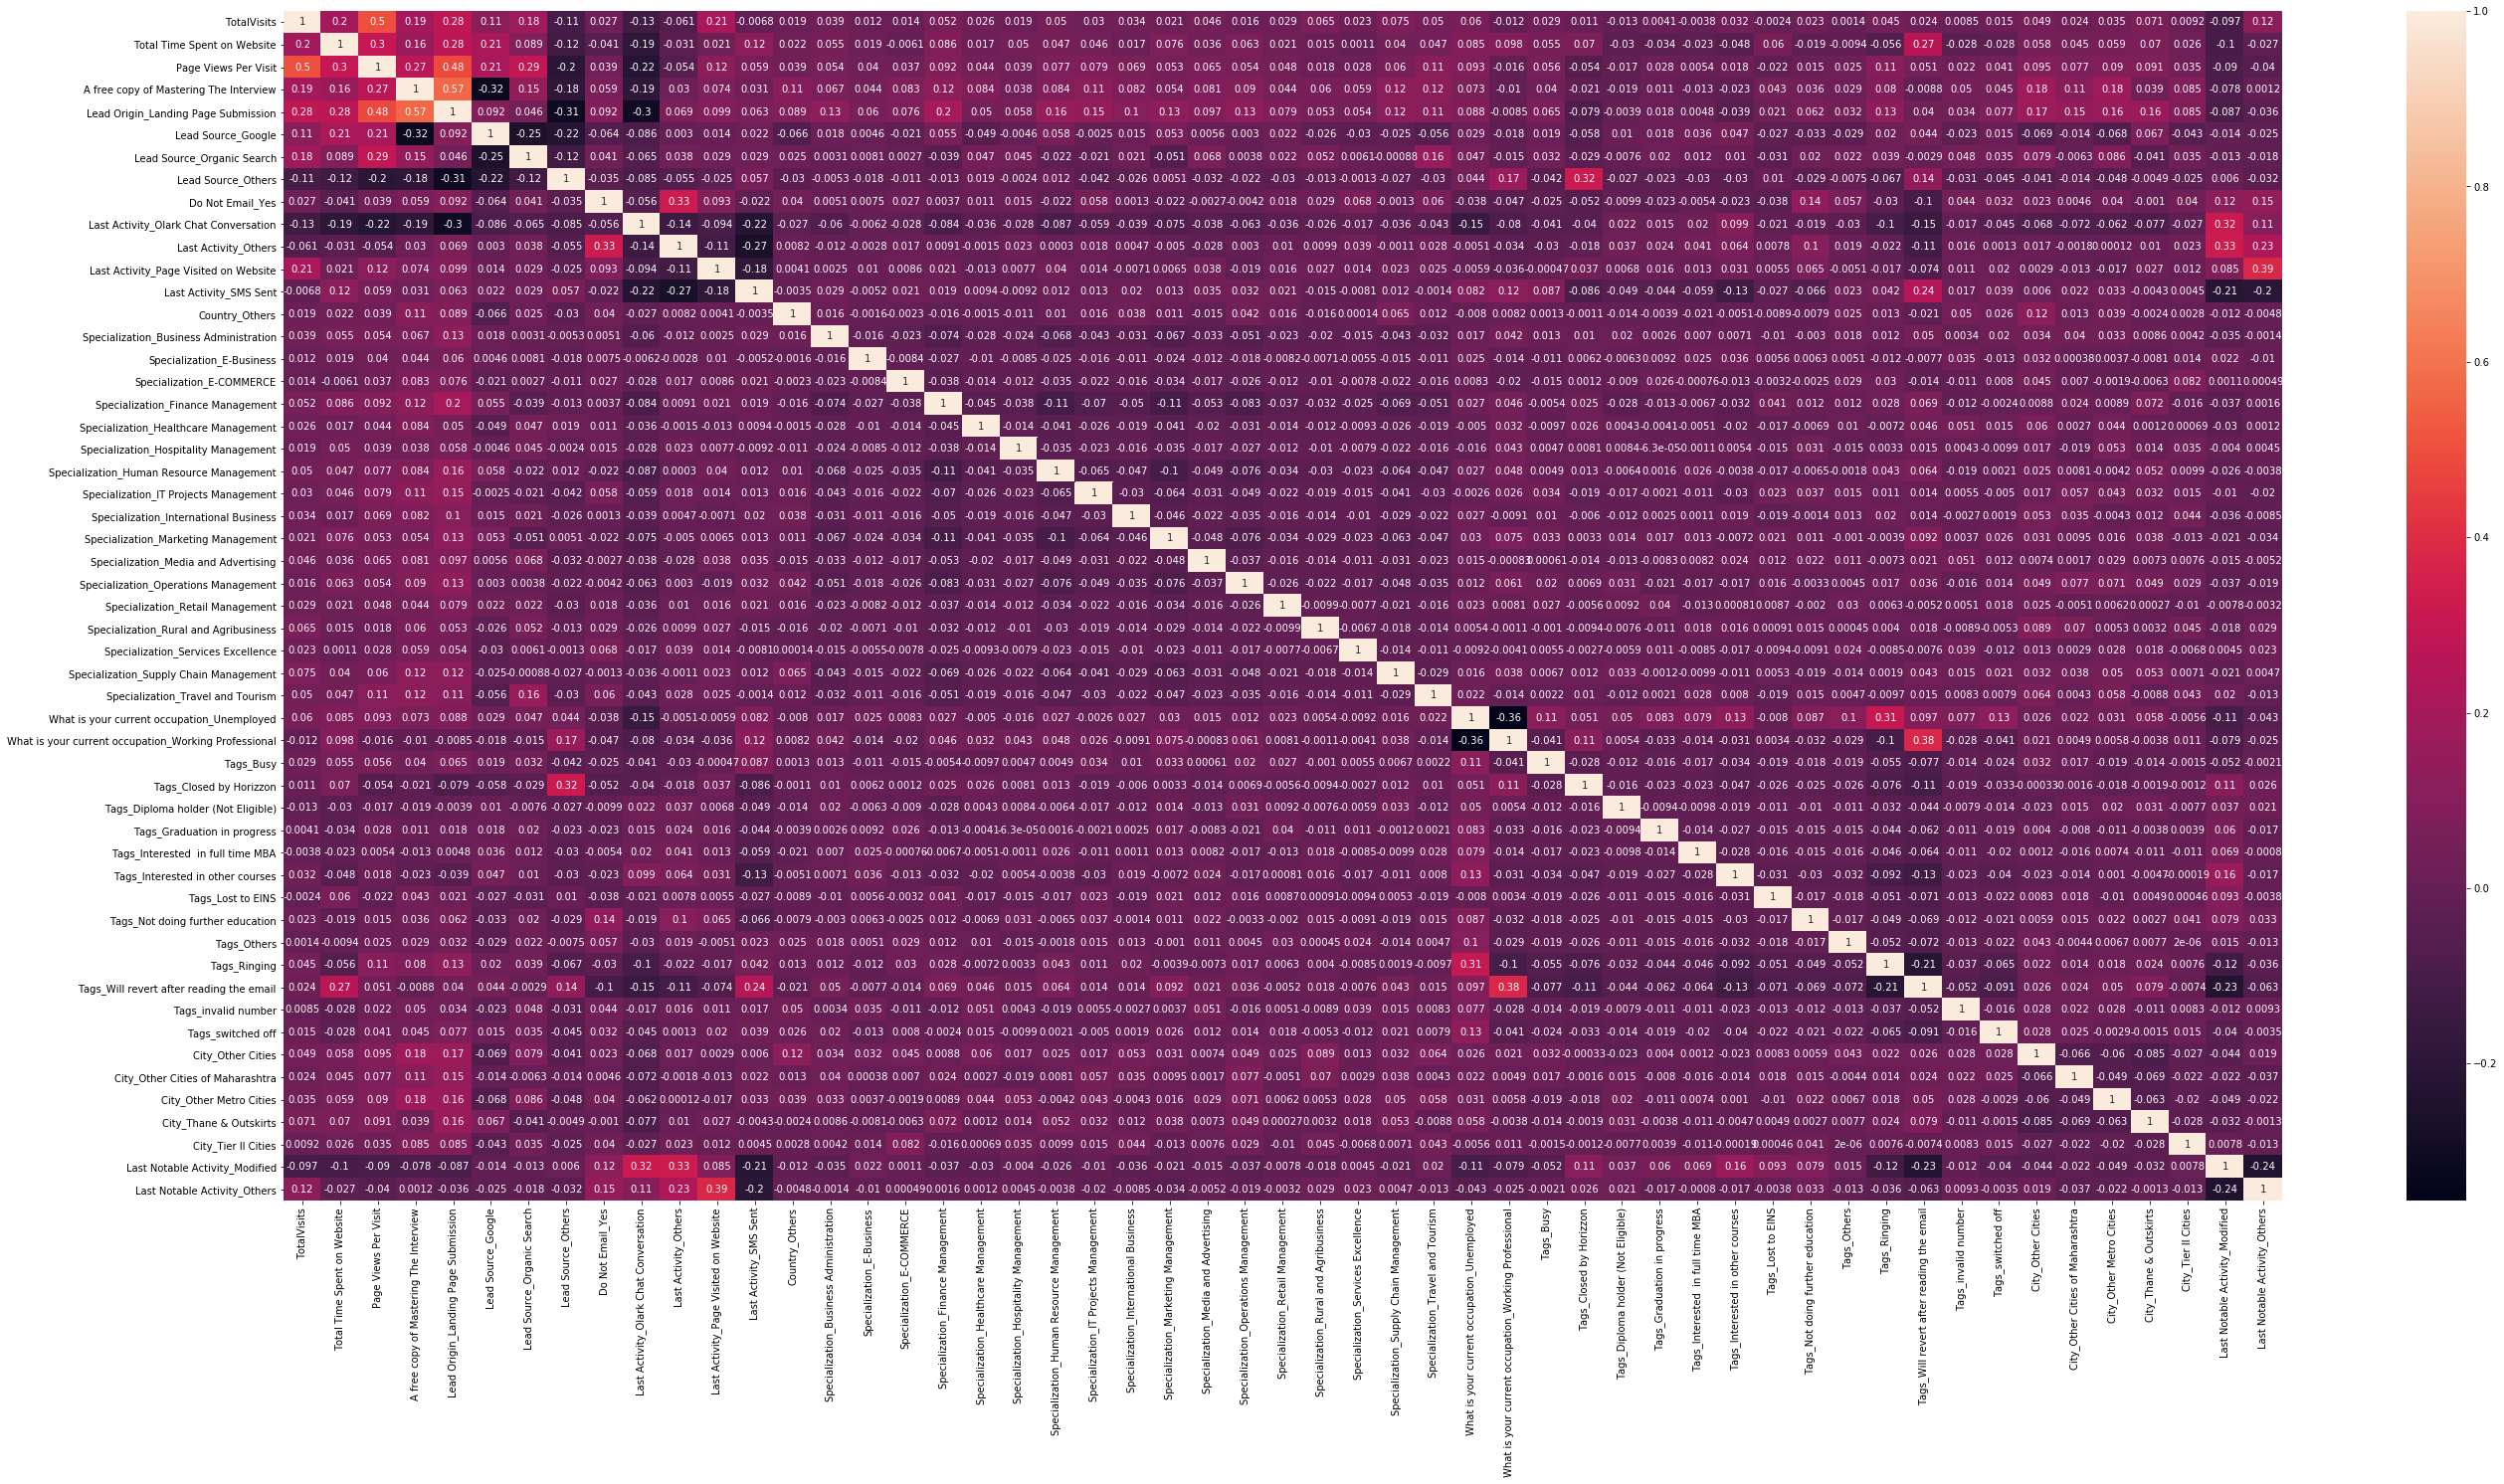

In [37]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model Building

In [38]:
import statsmodels.api as sm

In [39]:
# logm1 = sm.GLM(y_train, add_constant(X_train), family=sm.families.Binomial())